In [1]:
import jax

import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('../../')
from datasets import sin_data
from models import gaussian_mlp
from utilities import plot,fits,predict
from flax import linen as nn

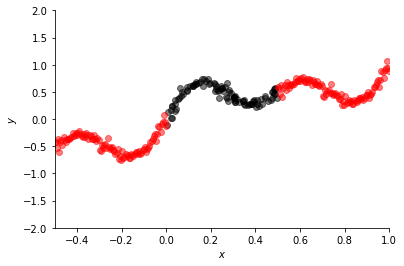

In [2]:
X,Y,x_test_1,y_test_1,x_test_2,y_test_2 = sin_data.load_data()
plot.plot_actualdata(X,Y,x_test_1,y_test_1,x_test_2,y_test_2)

In [3]:
# initialize model
model = gaussian_mlp.gmlp( features=[16,16], activations=[nn.relu, nn.relu],dropout_rate=[0,0])


In [4]:
# model.tabulate(jax.random.PRNGKey(1), X, deterministic=True)

In [21]:
params_list = []
losses_list = []
auxs = {
    "X" : X,
    "y" : Y,
    "deterministic": True,
}

for i in range(5):
    params = model.init(jax.random.PRNGKey(i), auxs['X'], deterministic = True)
    params, loss =  fits.fit(model, params, auxs, learning_rate=0.003, epochs=2000, verbose=False)
    params_list.append(params)
    losses_list.append(loss)



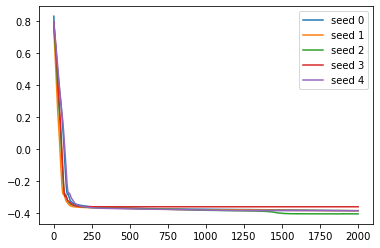

In [22]:
for i in range(5):
    plt.plot(jnp.arange(0,2000,1),losses_list[i],label='seed '+str(i))
plt.legend()

In [7]:
X  = jnp.sort(X[:,0]).reshape(100,1)
mean,sigma = predict.predict(5,model,params_list,X)
mean_lx,sigma_lx = predict.predict(5,model,params_list,x_test_1)
mean_ux,sigma_ux = predict.predict(5,model,params_list,x_test_2)

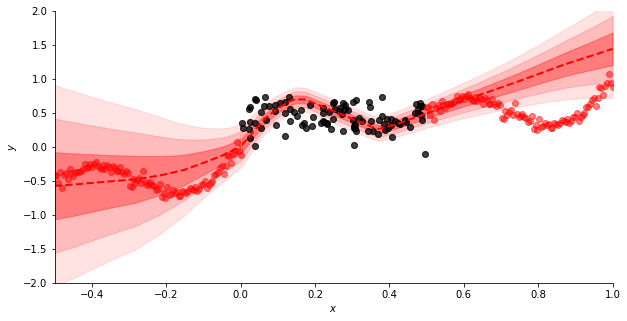

In [10]:
plt.figure(figsize=(10,5))
plt.plot(X,mean, "r--", linewidth=2)
plt.plot(x_test_1,mean_lx, "r--", linewidth=2)
plt.plot(x_test_2,mean_ux, "r--", linewidth=2)
for i_std in range(1,4):
  plt.fill_between(X.reshape(100), jnp.array((mean-i_std*sigma)), jnp.array((mean+i_std*sigma)), color='red',alpha=1/(3*i_std), label='std'+str(i_std))
for i_std in range(1,4):
  plt.fill_between(x_test_1.reshape(100), jnp.array((mean_lx-i_std*sigma_lx)), jnp.array((mean_lx+i_std*sigma_lx)), color='red',alpha=1/(3*i_std), label='std'+str(i_std))
for i_std in range(1,4):
  plt.fill_between(x_test_2.reshape(100), jnp.array((mean_ux-i_std*sigma_ux)), jnp.array((mean_ux+i_std*sigma_ux)), color='red',alpha=1/(3*i_std), label='std'+str(i_std))
plt.scatter(X, Y,color='black',alpha=0.5)
plot.plot_actualdata(X,Y,x_test_1,y_test_1,x_test_2,y_test_2)

# plt.plot(X, final_mean+final_sigma)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-2,2)
sns.despine()
plt.show()

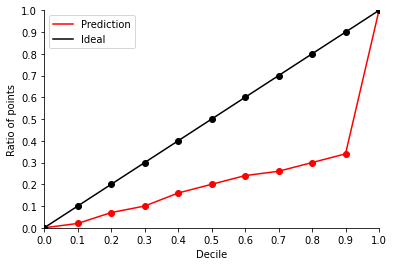

In [11]:
df = plot.calibration_regression(mean_ux,sigma_ux,y_test_2)


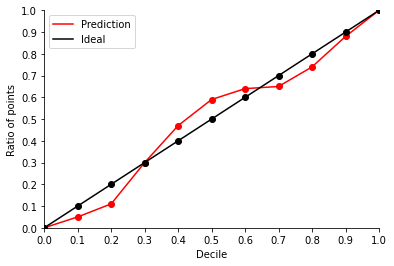

In [12]:
df = plot.calibration_regression(mean_lx,sigma_lx,y_test_1)




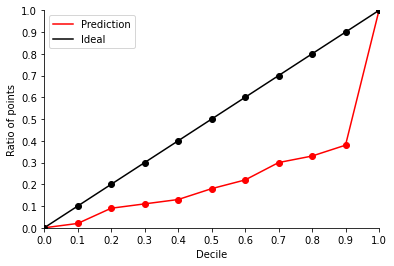

In [13]:
df = plot.calibration_regression(mean,sigma,Y)


In [14]:
seed=11
params = model.init(jax.random.PRNGKey(17), X, deterministic = True)
params, loss =  fits.fit(model, params, auxs, learning_rate=0.001, epochs=2000, verbose=True)


Loss step 0:  0.7502909
Loss step 200:  -0.52077407
Loss step 400:  -0.6433629
Loss step 600:  -1.0660919
Loss step 800:  -1.3378569
Loss step 1000:  -1.3594532
Loss step 1200:  -1.3683563
Loss step 1400:  -1.3771045
Loss step 1600:  -1.3845866
Loss step 1800:  -1.3912446


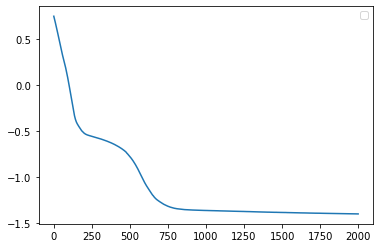

In [15]:
plt.plot(jnp.arange(0,2000,1),loss)
plt.legend()

In [16]:
X  = jnp.sort(X[:,0]).reshape(100,1)
mean,sigma = model.apply(params,X,deterministic=True)
mean_lx,sigma_lx = model.apply(params,x_test_1,deterministic=True)
mean_ux,sigma_ux = model.apply(params,x_test_2,deterministic=True)

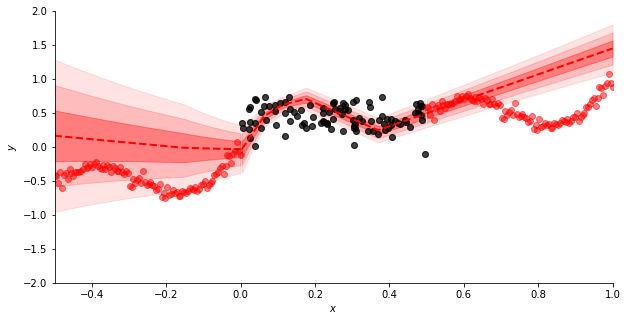

In [17]:
plt.figure(figsize=(10,5))
plt.plot(X,mean, "r--", linewidth=2)
plt.plot(x_test_1,mean_lx, "r--", linewidth=2)
plt.plot(x_test_2,mean_ux, "r--", linewidth=2)
for i_std in range(1,4):
  plt.fill_between(X.reshape(100), jnp.array((mean-i_std*sigma)), jnp.array((mean+i_std*sigma)), color='red',alpha=1/(3*i_std), label='std'+str(i_std))
for i_std in range(1,4):
  plt.fill_between(x_test_1.reshape(100), jnp.array((mean_lx-i_std*sigma_lx)), jnp.array((mean_lx+i_std*sigma_lx)), color='red',alpha=1/(3*i_std), label='std'+str(i_std))
for i_std in range(1,4):
  plt.fill_between(x_test_2.reshape(100), jnp.array((mean_ux-i_std*sigma_ux)), jnp.array((mean_ux+i_std*sigma_ux)), color='red',alpha=1/(3*i_std), label='std'+str(i_std))
plt.scatter(X, Y,color='black',alpha=0.5)
plot.plot_actualdata(X,Y,x_test_1,y_test_1,x_test_2,y_test_2)

# plt.plot(X, final_mean+final_sigma)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-2,2)
sns.despine()
plt.show()

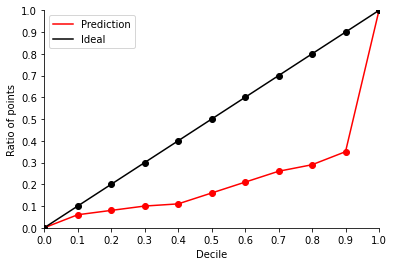

In [18]:
df = plot.calibration_regression(mean,sigma,Y)


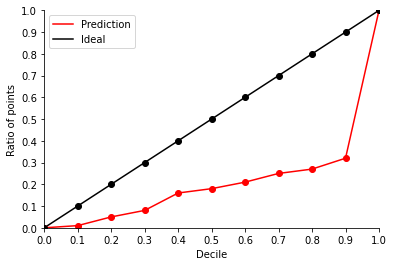

In [19]:
df = plot.calibration_regression(mean_ux,sigma_ux,y_test_2)

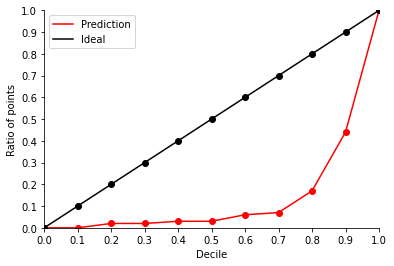

In [20]:
df = plot.calibration_regression(mean_lx,sigma_lx,y_test_1)